## Analiza exploratorie a datelor

## 04. ANALIZA EXPLORATORIE A DATELOR - PROIECT AID2023

In [2]:
#Am instalat librăriile corespunzătoare 
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install statsmodels
!pip install pandas
!pip install -U scikit-learn

In [3]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, kurtosis
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency

In [4]:
#Am descărcat baza de date curățată
df = pd.read_csv("school_buildings_siiir_en_lhdi_team2 final.csv")
df.head(5)

,idSchool,siruesCode,shortName,county,locality,studyFormationsCount,studentsCount,personnelCount,generalState,buildingMaterial,...,MEDIA,MEDIA V-VIII,SIRUTA,LHDI2018,IDUL2018quintile,hcapmat18,hconectint18,hrsm18,POPD2018,SIRINF
0,11266917,120437849,"COLEGIUL NATIONAL ""EMIL RACOVITA"" CLUJ-NAPOCA",CLUJ,CLUJ-NAPOCA,36,1071,88,1,CARAMIDA,...,9.85,9.89,54975,80.1,5,80.5,98.5,26.9,32367,54984
1,11266917,120437849,"COLEGIUL NATIONAL ""EMIL RACOVITA"" CLUJ-NAPOCA",CLUJ,CLUJ-NAPOCA,36,1071,88,1,CARAMIDA,...,9.67,9.67,54975,80.1,5,80.5,98.5,26.9,32367,54984
2,11266917,120437849,"COLEGIUL NATIONAL ""EMIL RACOVITA"" CLUJ-NAPOCA",CLUJ,CLUJ-NAPOCA,36,1071,88,1,CARAMIDA,...,9.40,9.86,54975,80.1,5,80.5,98.5,26.9,32367,54984
3,11266917,120437849,"COLEGIUL NATIONAL ""EMIL RACOVITA"" CLUJ-NAPOCA",CLUJ,CLUJ-NAPOCA,36,1071,88,1,CARAMIDA,...,9.00,9.21,54975,80.1,5,80.5,98.5,26.9,32367,54984
4,11266917,120437849,"COLEGIUL NATIONAL ""EMIL RACOVITA"" CLUJ-NAPOCA",CLUJ,CLUJ-NAPOCA,36,1071,88,1,CARAMIDA,...,9.95,9.85,54975,80.1,5,80.5,98.5,26.9,32367,54984


In [5]:
df = df.copy()
df.rename(columns = {'idSchool':'school_no'}, inplace = True)

In [6]:
#Am verificat denumirea coloanelor 
df.columns

Index(['school_no', 'siruesCode', 'shortName', 'county', 'locality',
       'studyFormationsCount', 'studentsCount', 'personnelCount',
       'generalState', 'buildingMaterial', 'roofMaterial', 'roofCondition',
       'joineryCondition', 'windowJoinery', 'doorJoinery', 'cod_SIIIR',
       'jud_loc', 'COD UNIC CANDIDAT', 'SEX', 'MEDIU', 'MEDIA', 'MEDIA V-VIII',
       'SIRUTA', 'LHDI2018', 'IDUL2018quintile', 'hcapmat18', 'hconectint18',
       'hrsm18', 'POPD2018', 'SIRINF'],
      dtype='object')

In [7]:
# Facem drop la coloanele de care nu avem nevoie pentru analiză
df.drop(columns=['siruesCode', 'county', 'studentsCount', 'personnelCount', 'studyFormationsCount', 'cod_SIIIR', 'jud_loc', 'MEDIA V-VIII', 'SIRUTA',
       'IDUL2018quintile', 'hcapmat18', 'hrsm18', 'SIRINF'], inplace=True) ## Stergem coloana cu Media V - VIII, a se consulta metodologia
df.head()

,school_no,shortName,locality,generalState,buildingMaterial,roofMaterial,roofCondition,joineryCondition,windowJoinery,doorJoinery,COD UNIC CANDIDAT,SEX,MEDIU,MEDIA,LHDI2018,hconectint18,POPD2018
0,11266917,"COLEGIUL NATIONAL ""EMIL RACOVITA"" CLUJ-NAPOCA",CLUJ-NAPOCA,1,CARAMIDA,TIGLA CERAMICA,1,1,MIXTA,MIXTA,10107762,M,URBAN,9.85,80.1,98.5,32367
1,11266917,"COLEGIUL NATIONAL ""EMIL RACOVITA"" CLUJ-NAPOCA",CLUJ-NAPOCA,1,CARAMIDA,TIGLA CERAMICA,1,1,MIXTA,MIXTA,10302839,F,URBAN,9.67,80.1,98.5,32367
2,11266917,"COLEGIUL NATIONAL ""EMIL RACOVITA"" CLUJ-NAPOCA",CLUJ-NAPOCA,1,CARAMIDA,TIGLA CERAMICA,1,1,MIXTA,MIXTA,10107674,F,URBAN,9.40,80.1,98.5,32367
3,11266917,"COLEGIUL NATIONAL ""EMIL RACOVITA"" CLUJ-NAPOCA",CLUJ-NAPOCA,1,CARAMIDA,TIGLA CERAMICA,1,1,MIXTA,MIXTA,10283941,F,URBAN,9.00,80.1,98.5,32367
4,11266917,"COLEGIUL NATIONAL ""EMIL RACOVITA"" CLUJ-NAPOCA",CLUJ-NAPOCA,1,CARAMIDA,TIGLA CERAMICA,1,1,MIXTA,MIXTA,10311207,M,URBAN,9.95,80.1,98.5,32367


In [8]:
# Exploram distributiile
df.describe().round(1)

,school_no,generalState,roofCondition,joineryCondition,COD UNIC CANDIDAT,MEDIA,LHDI2018,hconectint18,POPD2018
count,3426.0,3426.0,3426.0,3426.0,3426.0,3426.0,3426.0,3426.0,3426.0
mean,11267142.2,2.7,2.9,2.5,10125419.8,7.6,74.3,87.1,27787.0
std,102.6,1.5,1.7,1.6,827460.0,1.8,9.5,17.5,11507.3
min,11266912.0,1.0,1.0,1.0,12585.0,1.9,23.7,24.4,923.0
25%,11267133.0,1.0,1.0,1.0,10061685.2,6.4,68.6,69.6,27903.0
50%,11267161.0,2.0,3.0,2.0,10132067.0,8.0,80.1,98.5,32367.0
75%,11267220.0,4.0,5.0,4.0,10368146.8,9.0,80.1,98.5,32367.0
max,11267360.0,5.0,5.0,5.0,14368762.0,10.0,80.1,127.6,56192.0


In [9]:
# Calculam asimetria si boltirea pentru variabilele: MEDIA, LHDI2018, hconectint18.

skew_values = df[['MEDIA', 'LHDI2018', 'hconectint18']].skew() 
kurtosis_values = df[['MEDIA', 'LHDI2018', 'hconectint18']].kurtosis()

print("Skewness pentru variabilele:")
print(skew_values)
print("\nKurtosis pentru variabilele:")
print(kurtosis_values)

Skewness pentru variabilele:
MEDIA          -0.820892
LHDI2018       -1.705515
hconectint18   -1.023406
dtype: float64

Kurtosis pentru variabilele:
MEDIA          -0.166817
LHDI2018        3.004260
hconectint18   -0.289561
dtype: float64


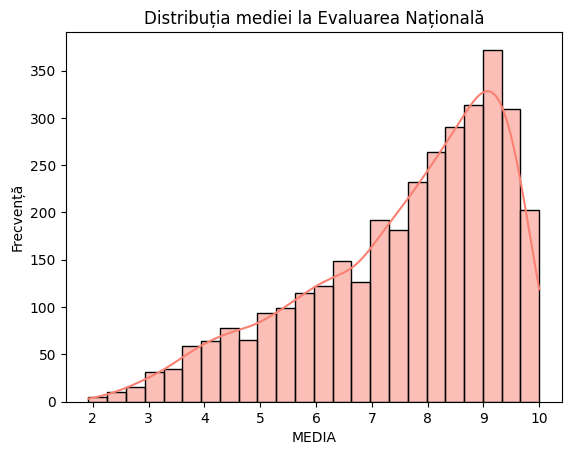

In [10]:
# Histograma pentru variabila continua 'MEDIA'

sns.histplot(df['MEDIA'], kde=True, color='salmon')
plt.title('Distribuția mediei la Evaluarea Națională')
plt.xlabel('MEDIA')
plt.ylabel('Frecvență')

plt.show()

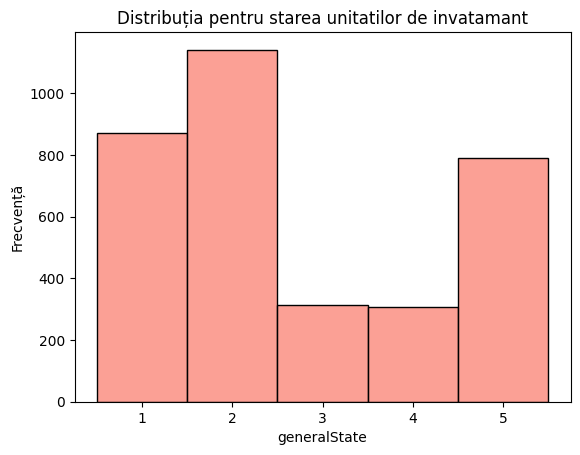

In [11]:
# Histograma pentru variabila ordinală 'generalState'

sns.histplot(df['generalState'], discrete=True, color='salmon')
plt.title('Distribuția pentru starea unitatilor de invatamant')
plt.xlabel('generalState')
plt.ylabel('Frecvență')
plt.show()

Text(0, 0.5, 'Frecvență')

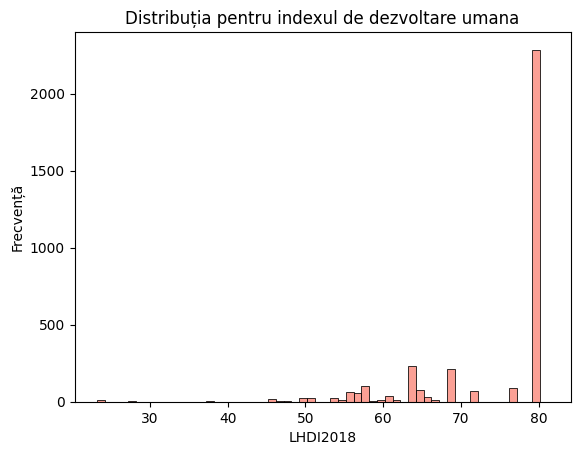

In [12]:
# Histograma pentru variabila 'LHDI2018'

sns.histplot(df['LHDI2018'], discrete=True, color='salmon')
plt.title('Distribuția pentru indexul de dezvoltare umana')
plt.xlabel('LHDI2018')
plt.ylabel('Frecvență')

Text(0, 0.5, 'Frecvență')

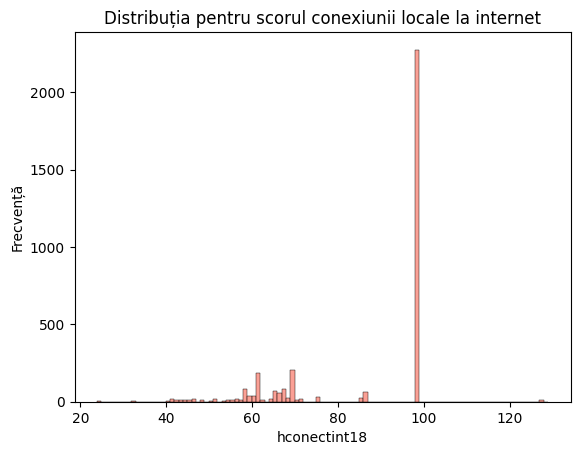

In [13]:
# Histograma pentru variabila 'hconectint18'

sns.histplot(df['hconectint18'], discrete=True, color='salmon')
plt.title('Distribuția pentru scorul conexiunii locale la internet')
plt.xlabel('hconectint18')
plt.ylabel('Frecvență')

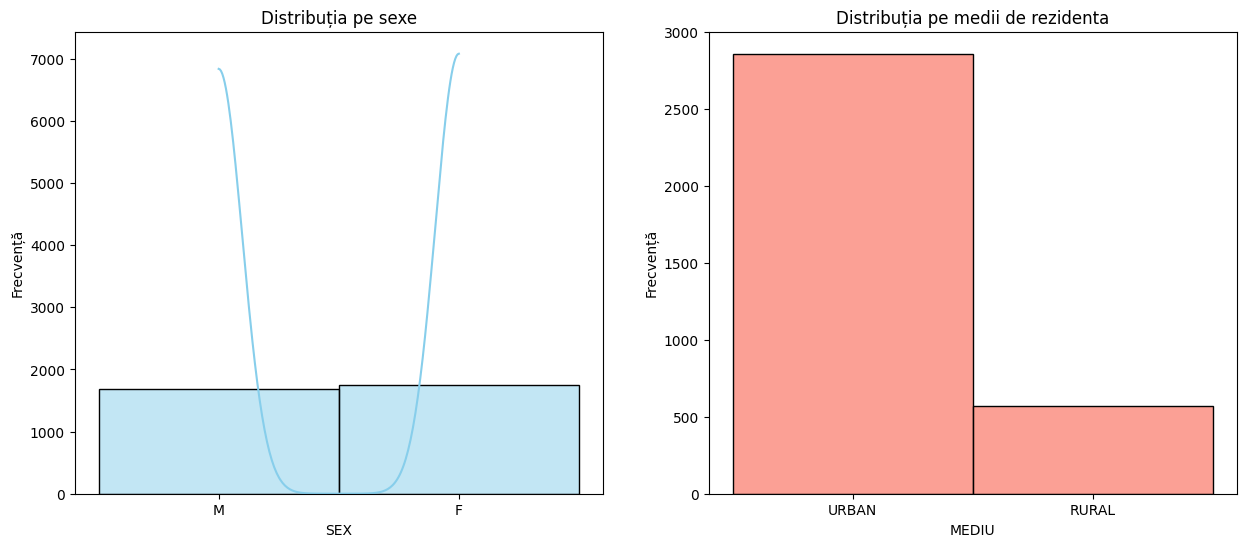

In [14]:
# Histograma pentru variabilele 'SEX' si 'MEDIU'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
 
# Histograma pentru variabila continua 'MEDIA'
sns.histplot(df['SEX'], kde=True, color='skyblue', ax=ax1)
ax1.set_title('Distribuția pe sexe')
ax1.set_xlabel('SEX')
ax1.set_ylabel('Frecvență')
 
# Histograma pentru variabila ordinală 'generalState'
sns.histplot(df['MEDIU'], discrete=True, color='salmon', ax=ax2)
ax2.set_title('Distribuția pe medii de rezidenta')
ax2.set_xlabel('MEDIU')
ax2.set_ylabel('Frecvență')
 
# Afișarea graficelor
plt.show()

In [19]:
df_selection = df[['generalState', 'roofCondition', 'joineryCondition', 'MEDIA', 'LHDI2018', 'hconectint18', 'POPD2018']]

In [23]:
df_selection.head()

,generalState,roofCondition,joineryCondition,MEDIA,LHDI2018,hconectint18,POPD2018
0,1,1,1,9.85,80.1,98.5,32367
1,1,1,1,9.67,80.1,98.5,32367
2,1,1,1,9.40,80.1,98.5,32367
3,1,1,1,9.00,80.1,98.5,32367
4,1,1,1,9.95,80.1,98.5,32367


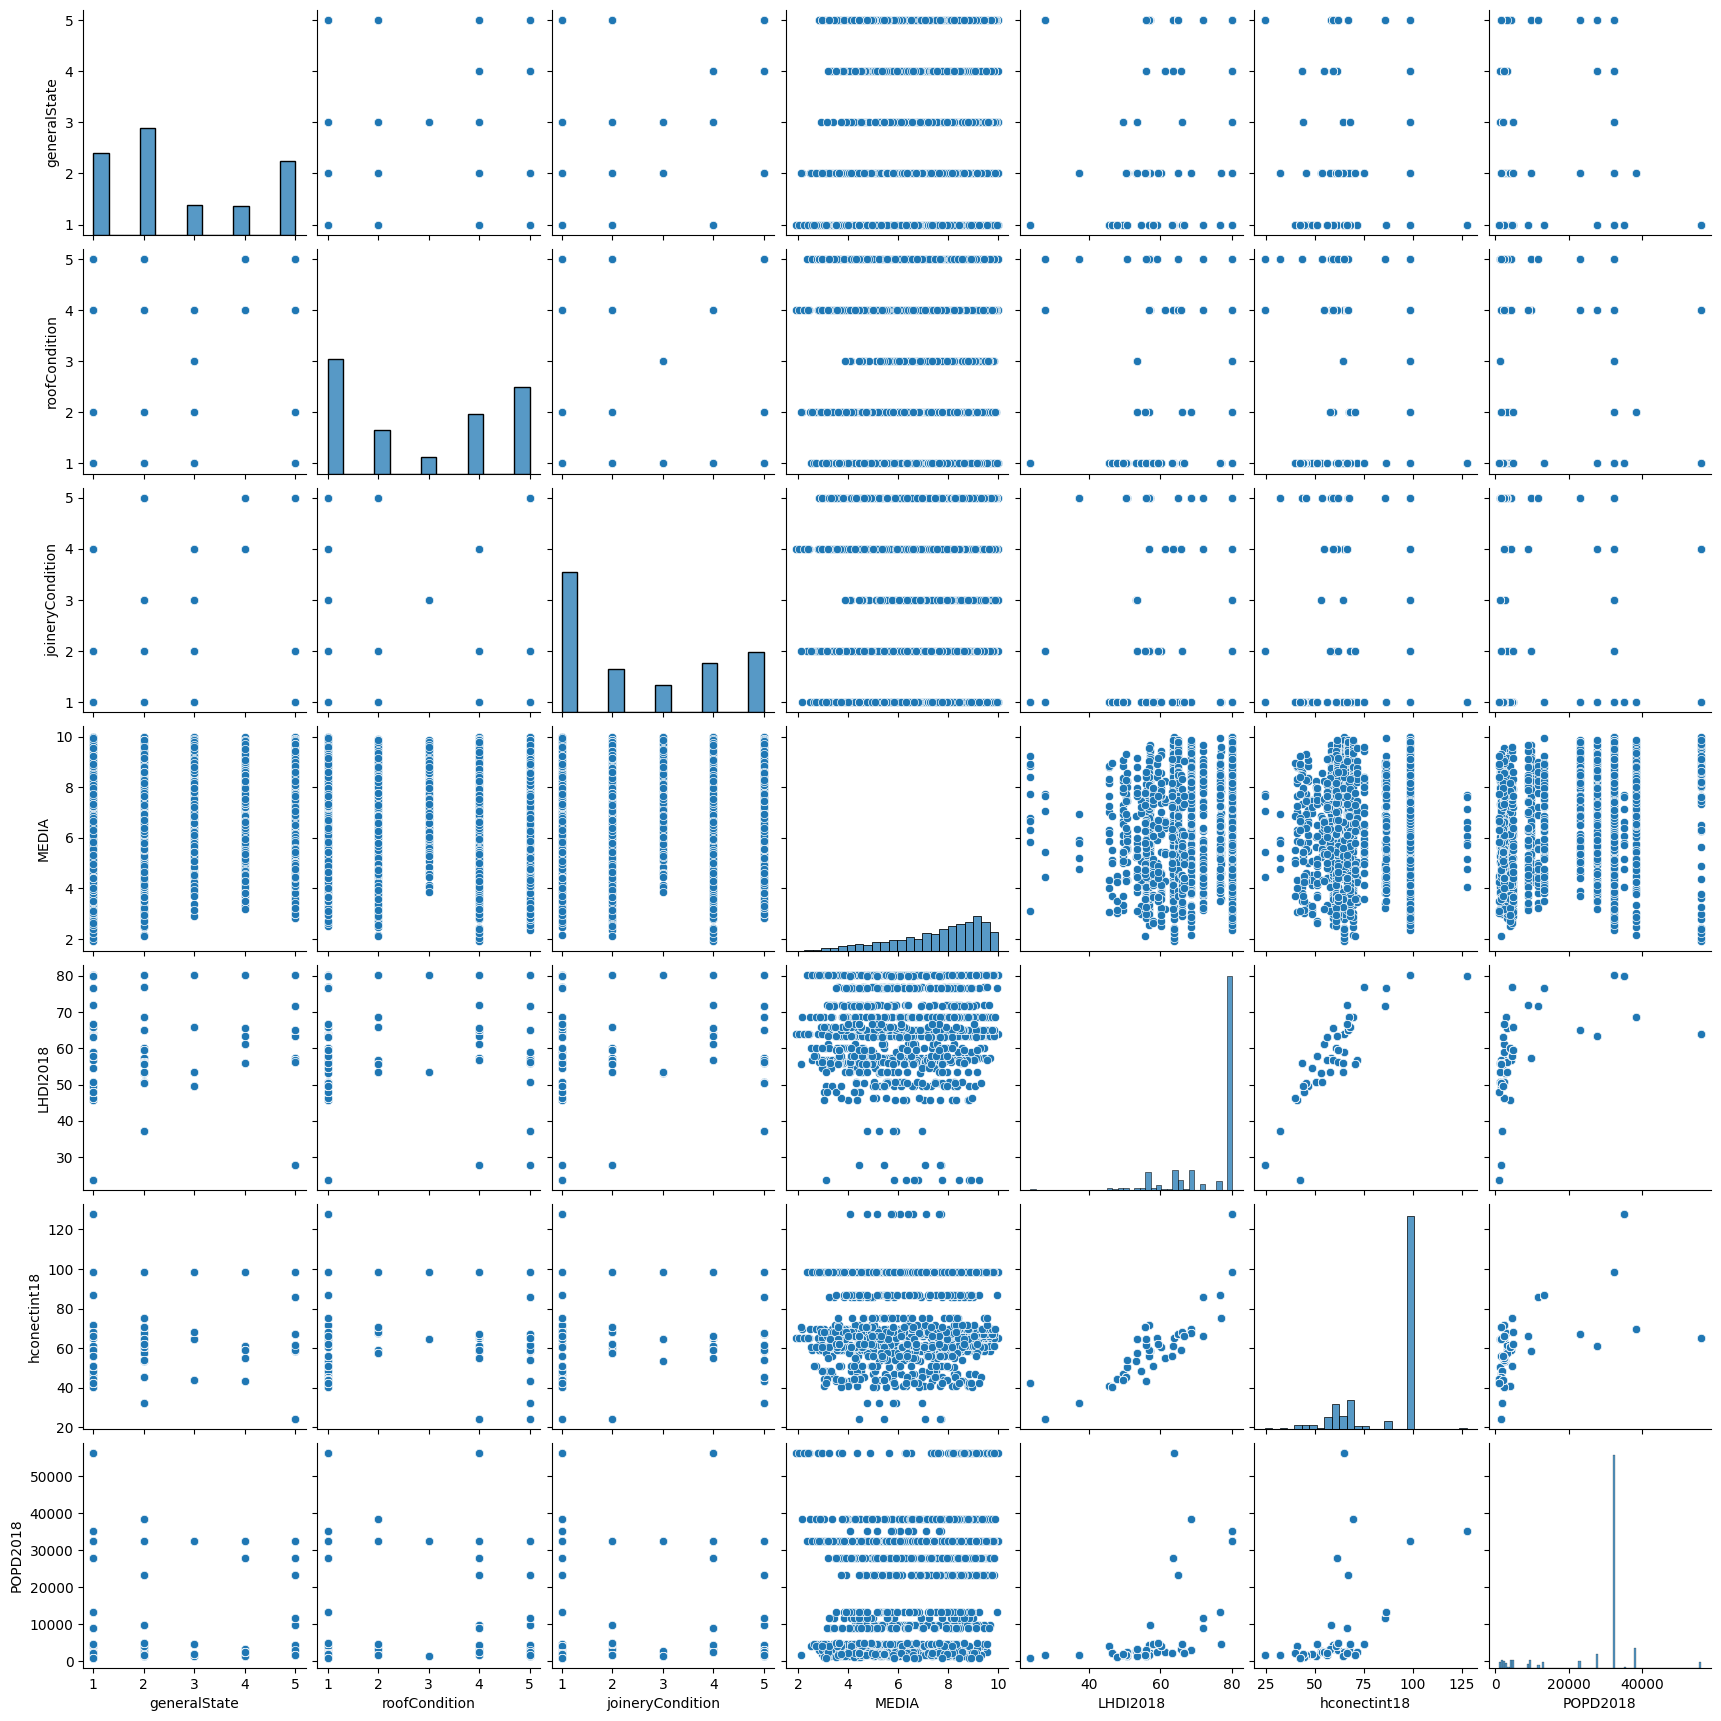

In [20]:
sns.pairplot(df_selection)

In [24]:
# Scalam datele si le standartizam 
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()

# Scalam datele
df_scaled_array = scaler.fit_transform(df_selection) 

# Cream un DataFrame din datele scalate
df_scaled = pd.DataFrame(df_scaled_array, columns=df_selection.columns)

In [25]:
df_scaled.head()

,generalState,roofCondition,joineryCondition,MEDIA,LHDI2018,hconectint18,POPD2018
0,-1.131311,-1.120421,-0.947497,1.281572,0.604292,0.652802,0.398067
1,-1.131311,-1.120421,-0.947497,1.180072,0.604292,0.652802,0.398067
2,-1.131311,-1.120421,-0.947497,1.027821,0.604292,0.652802,0.398067
3,-1.131311,-1.120421,-0.947497,0.802265,0.604292,0.652802,0.398067
4,-1.131311,-1.120421,-0.947497,1.337961,0.604292,0.652802,0.398067


<Axes: xlabel='MEDIA'>

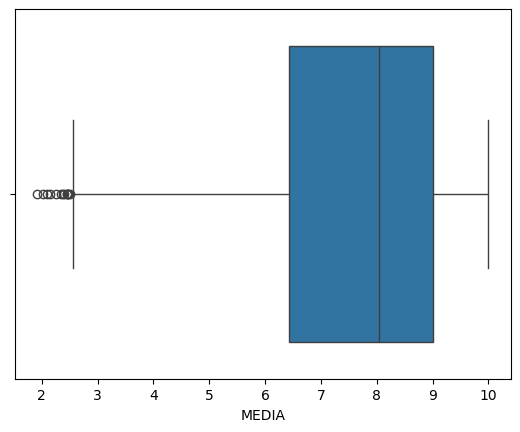

In [26]:
var = 'MEDIA'
sns.boxplot(x=var, data=df)

In [27]:
correlation_matrix = df_selection.corr()
correlation_matrix

,generalState,roofCondition,joineryCondition,MEDIA,LHDI2018,hconectint18,POPD2018
generalState,1.000000,0.734725,0.692217,0.071474,0.136496,0.151035,0.079599
roofCondition,0.734725,1.000000,0.672430,0.044980,0.158740,0.171399,0.075496
joineryCondition,0.692217,0.672430,1.000000,-0.007120,0.108139,0.124371,-0.024241
MEDIA,0.071474,0.044980,-0.007120,1.000000,0.345486,0.347139,0.377994
LHDI2018,0.136496,0.158740,0.108139,0.345486,1.000000,0.951347,0.658391
hconectint18,0.151035,0.171399,0.124371,0.347139,0.951347,1.000000,0.616027
POPD2018,0.079599,0.075496,-0.024241,0.377994,0.658391,0.616027,1.000000


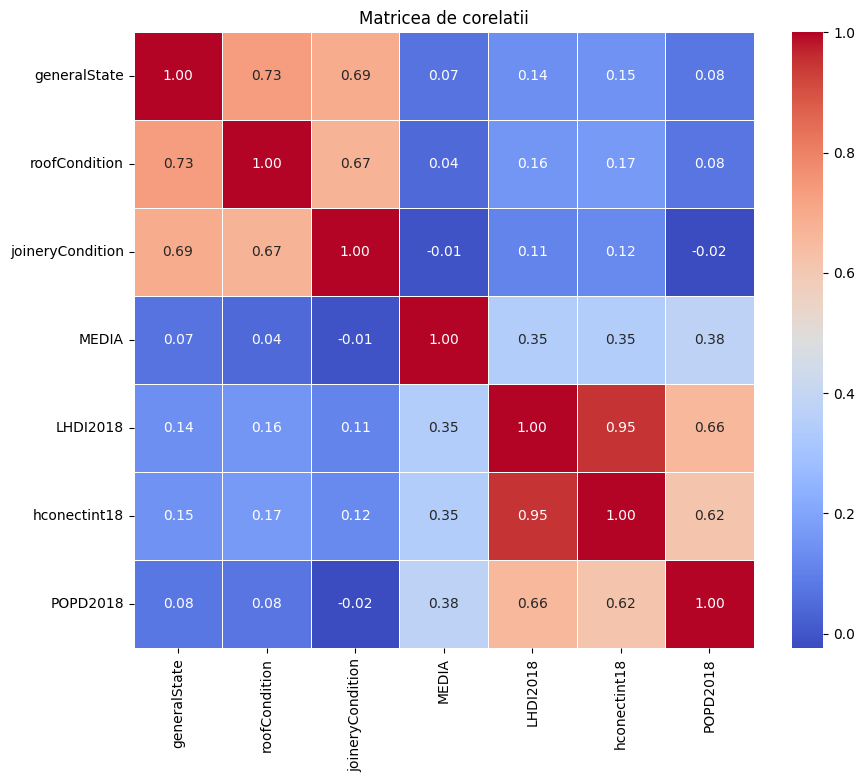

In [29]:
# Configuram figura matplot
plt.figure(figsize=(10, 8))

# Cream un heatmap folosind Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matricea de corelatii")
# Display the heatmap
plt.show()

In [ ]:
# Există o corelație pozitivă puternică între generalState și joineryCondition (0.878015).
# Există o corelație negativă puternică între joineryCondition și LHDI2018 (-0.733418).
# MEDIA are o corelație relativ slabă cu celelalte variabile.


Valoarea Chi-Pătrat: 261.61686658792416
Valoarea p (p-value): 2.0443838050598063e-55


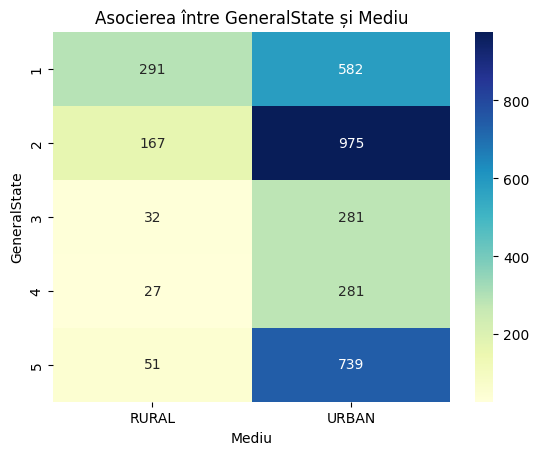

In [30]:
# Crearea tabelului de contingenta
contingency_table = pd.crosstab(df['generalState'],df['MEDIU'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Afișarea tabelului de contingenta
print("\nValoarea Chi-Pătrat:", chi2)
print("Valoarea p (p-value):", p_value)
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Asocierea între GeneralState și Mediu')
plt.xlabel('Mediu')
plt.ylabel('GeneralState')
plt.show()

In [ ]:
#Valoarea mare a Chi-Pătrat (261.62) indică o o asociere semnificativă între variabilele analizate.
#Valoarea mică a p-value (2.04e-55) sugerează că rezultatele sunt statistice semnificative.


Valoarea Chi-Pătrat: 100.32639441476894
Valoarea p (p-value): 1.3222506854908265e-21


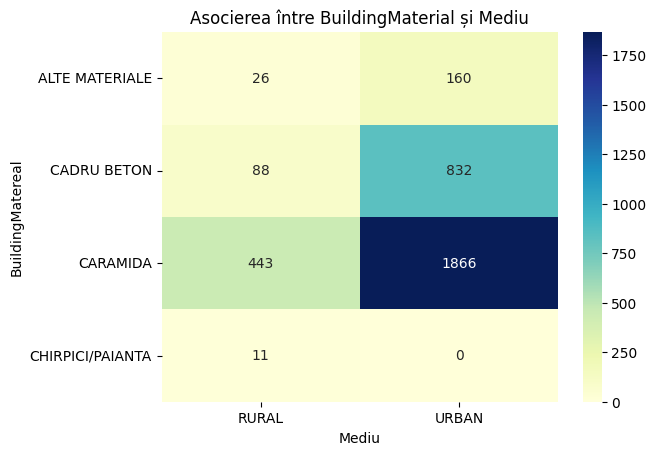

In [31]:
# Crearea tabelului de contingenta
contingency_table = pd.crosstab(df['buildingMaterial'],df['MEDIU'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Afișarea tabelului de contingenta
print("\nValoarea Chi-Pătrat:", chi2)
print("Valoarea p (p-value):", p_value)
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Asocierea între BuildingMaterial și Mediu')
plt.xlabel('Mediu')
plt.ylabel('BuildingMatereal')
plt.show()

In [ ]:
#Valoarea Chi-Pătrat (100.33),sugerează că există o asociere semnificativă între variabila "building material" și variabila "mediu".
#P-value (1.32e-21) este mult sub un nivel de semnificație obișnuit de 0.05, ceea ce sugerează că există o asociere semnificativă între cele două variabile. 



Valoarea Chi-Pătrat: 270.7504881991159
Valoarea p (p-value): 1.0533799153786922e-54


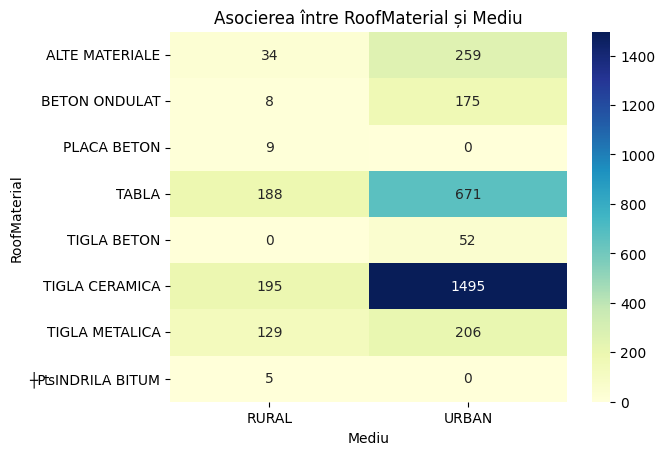

In [32]:
contingency_table = pd.crosstab(df['roofMaterial'],df['MEDIU'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Afișarea tabelului de contingenta
print("\nValoarea Chi-Pătrat:", chi2)
print("Valoarea p (p-value):", p_value)
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Asocierea între RoofMaterial și Mediu')
plt.xlabel('Mediu')
plt.ylabel('RoofMaterial')
plt.show()

In [ ]:
#Valoarea mare a Chi-Pătrat (270.75) indică o o asociere semnificativă între variabilele analizate.
#Valoarea mică a p-value (1.05e-54) sugerează că rezultatele sunt statistice semnificative.


Valoarea Chi-Pătrat: 219.66523382190968
Valoarea p (p-value): 2.2129323123315972e-46


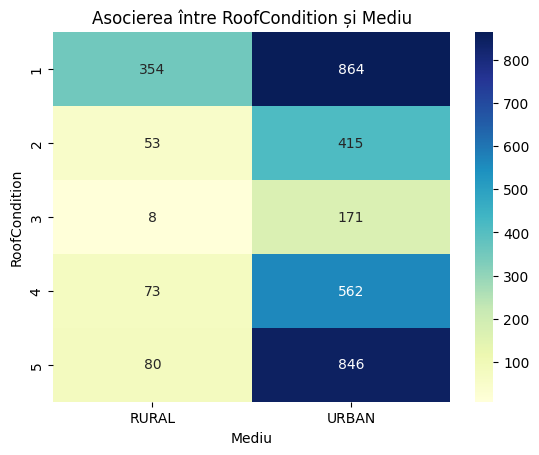

In [33]:
contingency_table = pd.crosstab(df['roofCondition'],df['MEDIU'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Afișarea tabelului de contingenta
print("\nValoarea Chi-Pătrat:", chi2)
print("Valoarea p (p-value):", p_value)
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Asocierea între RoofCondition și Mediu')
plt.xlabel('Mediu')
plt.ylabel('RoofCondition')
plt.show()


Valoarea Chi-Pătrat: 164.61736125044962
Valoarea p (p-value): 1.8475093635071293e-35


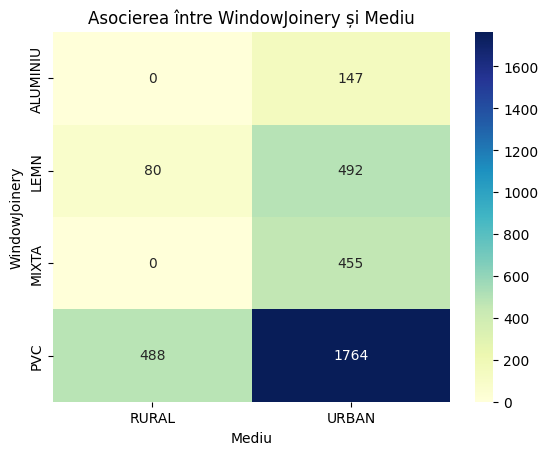

In [34]:
contingency_table = pd.crosstab(df['windowJoinery'],df['MEDIU'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Afișarea tabelului de contingenta
print("\nValoarea Chi-Pătrat:", chi2)
print("Valoarea p (p-value):", p_value)
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Asocierea între WindowJoinery și Mediu')
plt.xlabel('Mediu')
plt.ylabel('WindowJoinery')
plt.show()


Valoarea Chi-Pătrat: 488.48438313686364
Valoarea p (p-value): 1.4935360454081359e-105


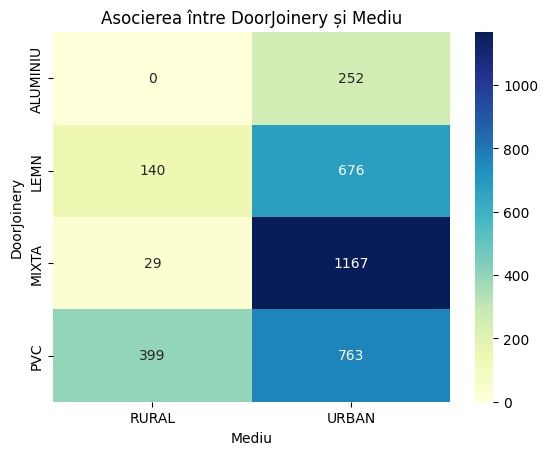

In [35]:
contingency_table = pd.crosstab(df['doorJoinery'],df['MEDIU'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Afișarea tabelului de contingenta
print("\nValoarea Chi-Pătrat:", chi2)
print("Valoarea p (p-value):", p_value)
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Asocierea între DoorJoinery și Mediu')
plt.xlabel('Mediu')
plt.ylabel('DoorJoinery')
plt.show()


Valoarea Chi-Pătrat: 65.97943990963074
Valoarea p (p-value): 1.5999052019912365e-13


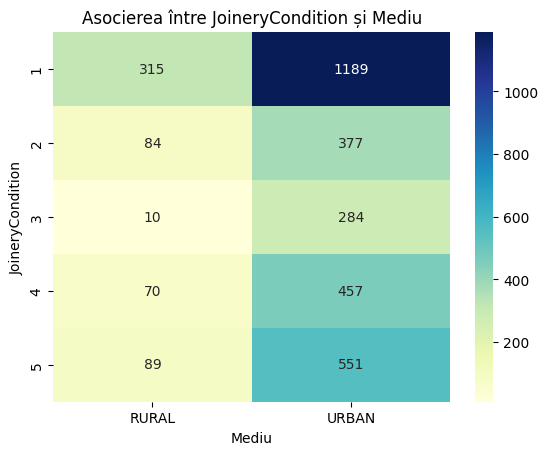

In [36]:
contingency_table = pd.crosstab(df['joineryCondition'],df['MEDIU'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Afișarea tabelului de contingenta
print("\nValoarea Chi-Pătrat:", chi2)
print("Valoarea p (p-value):", p_value)
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Asocierea între JoineryCondition și Mediu')
plt.xlabel('Mediu')
plt.ylabel('JoineryCondition')
plt.show()

In [ ]:
#Valoarea Chi-Pătrat (65.98) sugerează că există o asociere semnificativă între starea ușii și a geamurilor și tipul de mediul de rezidență în care se găsesc.